In [15]:
from utils import classify

In [16]:
class NaiveBayesClassifier:
    def __init__(self):
        self.cat = [3,6,7,8,9,10,11,13,14,15,16,17,18,21,23,29,30,31,32,33,34,35,36,37,38,39,40]
        self.num = []
        self.e = 2.71828182846
        self.pi = 3.14159265359
        for i in range(42): #ID and is_claim is excluded
            if i not in self.cat:
                self.num.append(i)
        print("NaiveBayesClassfier is created")
        
    def fit(self,X,y):
        self.data = X
        self.y = y
        self.posterior = dict()
        self.claim = [0,0] #Calculation of is_claim in categorical fit
        for i,d in enumerate(self.data):
            claim = self.y[i]
            self.claim[claim] += 1 
        self.categorical_prob()
        self.numerical_prob()
        
    
    def categorical_prob(self):
        # Initialize
        for c in self.cat:
            self.posterior[c] = dict()
        
        for i,d in enumerate(self.data):
            claim = self.y[i]
            for c in self.cat:
                if d[c] not in self.posterior[c].keys():
                    self.posterior[c][d[c]]=[0,0]
                self.posterior[c][d[c]][claim] += 1
        
        # Assume all features are independent
        # P(x_i|C_j) = count(x_i & C_j)/count(C_j)
        for k,v in self.posterior.items():
            for x,count in v.items():
                count[0] = count[0]/self.claim[0]
                count[1] = count[1]/self.claim[1]
            #print(k,v)
        
    def numerical_prob(self):
        # Assume all the continuous features are gaussian distribution
        # take all the data into a list
        subdata = dict()
        for c in self.num:
            # The first subarray store the data of is_claim=0, the second store the data of is_claim=1
            subdata[c] = [[0],[0]] # The first element of each subarray is the sum of the rest elements

        for i,d in enumerate(self.data):
            for c in self.num:
                claim = self.y[i]
                subdata[c][claim][0] += d[c]
                subdata[c][claim].append(d[c])

        # Calculate mean and variance
        for c in self.num:
            self.posterior[c] = [[0,1],[0,1]] # mean and variance of is_claim = 0, mean and variance of is_claim = 1
            for i in range(2):
                mean = subdata[c][i][0]/(len(subdata[c][i])-1)
                variance = 0
                for j in range(1,len(subdata[c][i])):
                    variance += ((subdata[c][i][j]-mean)**2)
                variance /= (len(subdata[c][i])-1)
                self.posterior[c][i] = [mean,variance]
                
    
    def predict_one(self,data):
        p0 = 1
        p1 = 1
        for c in self.cat:
            p0 *= self.posterior[c][data[c]][0]
            p1 *= self.posterior[c][data[c]][1]
        
        for n in self.num:
            mean0 = self.posterior[c][0][0]
            var0 = self.posterior[c][0][1]
            mean1 = self.posterior[c][1][0]
            var1 = self.posterior[c][1][1]
            p0 *= (self.e**(-((data[c]-mean0)**2)/2/var0)/(2*self.pi*var0)**0.5)
            p1 *= (self.e**(-((data[c]-mean1)**2)/2/var1)/(2*self.pi*var1)**0.5)
            #if p0>p1:
            #    cmp = '>'
            #else:
            #    cmp = '<'
            #print(f"{p0}{cmp}{p1}")
        
        p0 *= self.claim[0]/(self.claim[0]+self.claim[1])
        p1 *= self.claim[1]/(self.claim[0]+self.claim[1])
        if p0>p1:
            return 0
        else:
            return 1
        
    def score(self,X,y_true):
        y_pred = []

        for x in X:
            y_pred.append(self.predict_one(d))
        
        return confusion_matrix(y_true,y_pred)
    
    def predict(self,data):
        y_pred = []
        for d in data:
            y_pred.append(self.predict_one(d))
        return y_pred

NaiveBayesClassfier is created
Naive Bayes Clasifier:
Recall = 99.62%
Precision = 6.48%
Accuracy = 7.03%


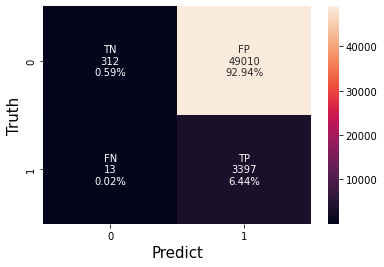

Recall = 99.41%
Precision = 5.77%
Accuracy = 6.35%


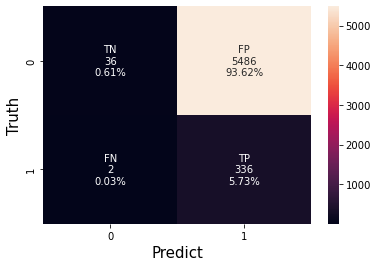

In [17]:
clf = NaiveBayesClassifier()
classify(clf,"Naive Bayes Clasifier")